<a href="https://colab.research.google.com/github/OZambranoE/Rcuperacion_Mo/blob/main/Recuperacion_Mo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import keras as kr
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    r2_score,
    mean_squared_error,
    explained_variance_score,
    mean_absolute_percentage_error,
)
import seaborn as sns

In [2]:
# Se cargan y visualizan los datos
filename = "/content/drive/MyDrive/Curso-ML-Geo/Clase3/Material_Curso_ML_OTEC/Recuperacion_Mo.xlsx"
df = pd.read_excel(filename)
df

,x,y,z,CuT,FeT,MoT,As,Zn,GL100,GL80,...,GLm20,Cp,Bo,Cc-Dg,Cv,Sulf Cu-As-Sb,Py,Mo,ALTE,RecMo
0,3161.178,3713.681,1639.951,0.557,1.608,0.101,1.608,0.064,24.997111,19.863694,...,50.219996,0.041642,0.323218,0.297395,0.043362,0.285380,2.449647,0.242866,312,70.150841
1,3022.929,3454.233,1541.843,0.317,0.680,0.160,0.680,0.041,29.392288,26.064212,...,36.693950,0.018859,0.031869,0.211882,0.057025,0.185290,0.921124,0.355160,312,79.789402
2,3007.137,3472.403,1418.166,0.433,1.340,0.114,1.340,0.080,25.708499,1.322988,...,66.551739,0.070440,0.036298,0.240757,0.017027,0.596946,1.860122,0.185452,312,75.849242
3,3261.819,4025.683,1598.728,0.870,1.707,0.192,1.707,0.206,32.095736,4.788359,...,54.567560,0.414674,0.130695,0.607531,0.082603,0.193856,2.520906,0.333061,309,76.751825
4,3079.172,3978.045,1576.884,0.839,1.579,0.098,1.579,0.034,31.215589,2.157102,...,62.576948,0.408389,0.134058,0.596804,0.144093,0.149750,2.523259,0.170448,309,80.819159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2868.793,2860.662,1852.644,1.591,0.620,0.127,0.620,0.014,23.894490,0.630609,...,54.244922,0.057458,1.445613,0.991058,0.038742,0.131427,0.403168,0.322452,309,64.930980
121,3570.107,4614.719,1884.769,0.625,0.840,0.170,0.840,0.006,16.150511,2.171803,...,8.256252,0.731052,0.711063,0.021937,0.010503,0.001992,0.041565,0.294823,307,71.285097
122,3641.364,4997.703,2001.847,0.347,1.010,0.017,1.010,0.005,29.878986,0.000000,...,54.200761,1.036015,0.067806,0.013492,0.000672,0.000088,0.177374,0.019680,318,65.727554
123,3097.595,2903.465,1931.371,0.759,0.840,0.026,0.840,0.009,3.502710,1.401084,...,89.518589,2.092664,0.063286,0.025741,0.002920,0.021839,0.092908,0.059430,303,49.260355


In [3]:
# se ve que todos los datos son de tipo numerico y no existen datos faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x              125 non-null    float64
 1   y              125 non-null    float64
 2   z              125 non-null    float64
 3   CuT            125 non-null    float64
 4   FeT            125 non-null    float64
 5   MoT            125 non-null    float64
 6   As             125 non-null    float64
 7   Zn             125 non-null    float64
 8   GL100          125 non-null    float64
 9   GL80           125 non-null    float64
 10  GL50           125 non-null    float64
 11  GL20           125 non-null    float64
 12  GLm20          125 non-null    float64
 13  Cp             125 non-null    float64
 14  Bo             125 non-null    float64
 15  Cc-Dg          125 non-null    float64
 16  Cv             125 non-null    float64
 17  Sulf Cu-As-Sb  125 non-null    float64
 18  Py        

In [4]:
# tampoco existen filas duplicadas
df.duplicated().sum()

0

In [5]:
# Aquí separamos nuestras variables en una matriz 'X' y la variable respuesta y = RecMo
X = df.drop(['RecMo'],axis = 1)
y = df['RecMo']

In [6]:
df.describe()

,x,y,z,CuT,FeT,MoT,As,Zn,GL100,GL80,...,GLm20,Cp,Bo,Cc-Dg,Cv,Sulf Cu-As-Sb,Py,Mo,ALTE,RecMo
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,3113.362656,3437.996512,1809.158112,0.841907,1.616472,0.131168,1.616472,0.069520,27.557085,5.313327,...,51.482113,0.383108,0.214545,0.432231,0.110857,0.472094,2.745726,0.265569,307.904000,68.493483
std,204.686915,585.265456,202.633017,0.402163,1.000242,0.084495,1.000242,0.180281,13.617769,6.719451,...,17.732344,0.635894,0.330046,0.414710,0.221053,0.459294,2.544445,0.171153,4.487301,8.906808
min,2817.100000,2520.636000,1359.348000,0.202000,0.370000,0.005000,0.370000,0.002000,2.858944,0.000000,...,8.256252,0.003024,0.000950,0.005056,0.000000,0.000088,0.007772,0.006732,301.000000,37.735849
25%,2967.605000,2903.465000,1646.099000,0.568000,0.980000,0.065000,0.980000,0.013000,17.635030,1.153161,...,40.226178,0.028392,0.032851,0.100429,0.016239,0.073433,0.921124,0.131837,303.000000,64.561300
50%,3062.008000,3402.121000,1839.554000,0.769000,1.320000,0.120000,1.320000,0.032000,25.708499,2.485918,...,51.025664,0.076321,0.091509,0.286277,0.036031,0.352008,2.009720,0.248396,309.000000,70.421197
75%,3207.658000,3790.943000,1953.365000,1.031000,1.989000,0.183000,1.989000,0.064000,34.142256,7.271362,...,63.938804,0.414674,0.229471,0.623246,0.102299,0.757666,3.676566,0.350826,312.000000,75.234529
max,3696.056000,4997.703000,2272.338000,2.597000,6.190000,0.507000,6.190000,1.877000,68.390140,28.485571,...,93.044908,4.390336,1.680156,1.635177,1.455746,2.148543,13.693009,0.824117,318.000000,84.427564


Text(0.5, 1.0, 'Boxplot')

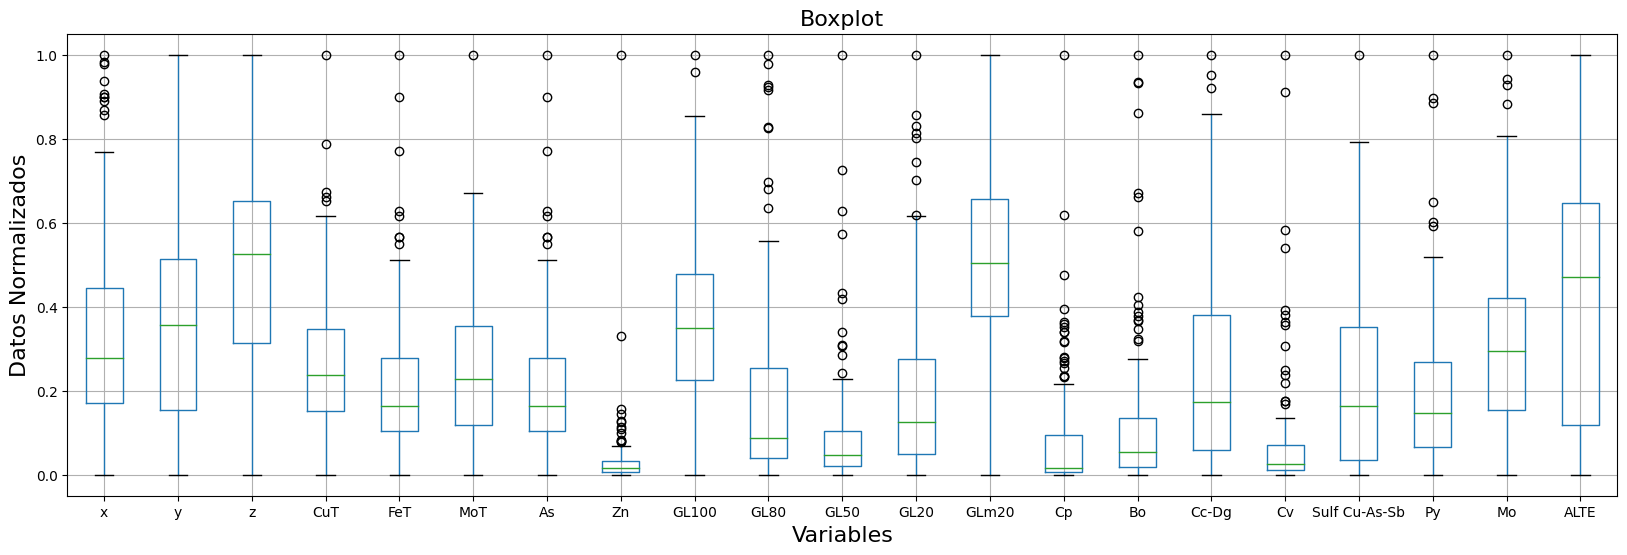

In [7]:
### Normalizacion de datos entre 0 y 1 y exploracion de datos
X_nor = (X-X.min())/(X.max()-X.min())
fig = plt.figure(figsize=(20,6))
X_nor.boxplot()
plt.ylabel('Datos Normalizados',fontsize=16)
plt.xlabel("Variables",fontsize=16)
plt.title("Boxplot",fontsize=16)

In [8]:
# Separamos nuestra base de datos en un conjunto de entrenamiento y un conjunto de predición

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Se prueban distintos modelos

In [9]:
# Se comienza con una regresion lineal
from sklearn.linear_model import LinearRegression

In [10]:
# Crear el objeto del escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Crear el objeto del modelo de regresión lineal
regression_model = LinearRegression()

In [12]:
# Ajustar el modelo utilizando el conjunto de entrenamiento escalado
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
# Realizar predicciones utilizando el conjunto de entrenamiento escalado
train_predictions = regression_model.predict(X_train_scaled)

# Realizar predicciones utilizando el conjunto de prueba escalado
test_predictions = regression_model.predict(X_test_scaled)

In [14]:
# Calcular las puntuaciones R² del modelo en los conjuntos de entrenamiento y prueba
train_score = regression_model.score(X_train_scaled, y_train)
test_score = regression_model.score(X_test_scaled, y_test)

print("Puntuación R² en el conjunto de entrenamiento:", train_score)
print("Puntuación R² en el conjunto de prueba:", test_score)

Puntuación R² en el conjunto de entrenamiento: 0.6966144779003896
Puntuación R² en el conjunto de prueba: 0.2938216457259333


In [15]:
# Ahora un modelo de arbol de regresion

In [16]:
# se importa e intancia el modelo (por defecto)
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [17]:
# se ajusta el modelo usando los datos de entrenamiento.  El modelo está aprendiendo la relación entre las características (X) y el objetivo (y).
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
# predecir los valores objetivos para el conjunto de entrenamiento y de prueba.
train_preds = dec_tree.predict(X_train_scaled)
test_preds = dec_tree.predict(X_test_scaled)

In [19]:
# se evalua el modelo con R^2 (coeficiente de determinación)
#se observa que el modelo esta groseramente sobreentrenado.
train_score = dec_tree.score(X_train_scaled, y_train)
test_score = dec_tree.score(X_test_scaled, y_test)
print(train_score)
print(test_score)

1.0
0.07262004756327634


In [20]:
# Lista de valores a probar para max_depth (para poder ajustar el modelo):
max_depth_range = list(range(2, 42))
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                             random_state = 42)
    dec_tree.fit(X_train_scaled, y_train)
    score = dec_tree.score(X_test_scaled, y_test)
    r2.append(score)

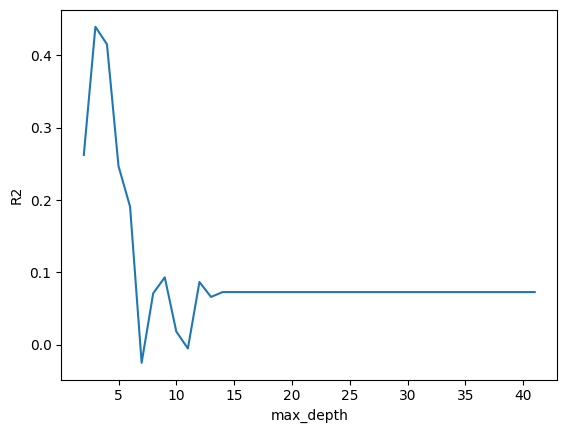

In [21]:
# Visualizar qué max_depth lleva a una puntuación R2 más alta
# se observa que el R2 mas alto se da con una profundidad de 5
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [22]:
# Ejecutemos el modelo con nuestro valor optimizado para max_depth
dec_tree_4 = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_4.fit(X_train_scaled, y_train)
# se evalua nuevamente el modelo con R^2 (coeficiente de determinación)
# se observa que el modelo mejoró bastante
train_4_score = dec_tree_4.score(X_train_scaled, y_train)
test_4_score = dec_tree_4.score(X_test_scaled, y_test)
print(train_4_score)
print(test_4_score)

0.8374554841182903
0.4155574108216562


In [23]:
# Ahora la red neuronal

In [24]:
X = df.drop(['RecMo'],axis = 1)
y = df['RecMo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [25]:
y_train = y_train.values.reshape(-1,1)
y_test  = y_test.values.reshape(-1,1)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler  = scaler.transform(X_test)


scaler2 = StandardScaler()
scaler2.fit(y_train)
y_train_scaler = scaler2.transform(y_train)
y_test_scaler  = scaler2.transform(y_test)

In [27]:
input_shape = X_train.shape[1]
input_shape

21

In [35]:
model = Sequential()

model.add(Dense(21,input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2)) ## apagamos el 20% de las neuronas para evitar sobre ajuste
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])

#model.compile(loss='mse',optimizer=kr.optimizers.SGD(learning_rate=0.01), metrics=['mean_absolute_error'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 21)                462       
                                                                 
 dense_4 (Dense)             (None, 10)                220       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train_scaler, y_train_scaler,
          epochs=100, batch_size = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.5599 - mean_absolute_error: 0.9197
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 1.2600 - mean_absolute_error: 0.8512
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 1.2012 - mean_absolute_error: 0.8516
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 1.3814 - mean_absolute_error: 0.9034
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 1.3544 - mean_absolute_error: 0.9097
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 1.3785 - mean_absolute_error: 0.8844
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0989 - mean_absolute_error: 0.8012
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 1.2957 - mean_absolute_error: 0.8169
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 1.0566 - mean_absolute_error: 0.7854
Epoch 10/100
1/1 [===

In [30]:
y_train_real       = pd.DataFrame(y_train)
y_train_pred = model.predict(pd.DataFrame(X_train_scaler))
valores_reescalados = scaler2.inverse_transform(y_train_pred)
y_train_pred = pd.DataFrame(valores_reescalados)

4/4 [==============================] - 0s 5ms/step


In [31]:
y_test_real       = pd.DataFrame(y_test)
y_test_pred = model.predict(pd.DataFrame(X_test_scaler))
valores_reescalados = scaler2.inverse_transform(y_test_pred)
y_test_pred = pd.DataFrame(valores_reescalados)

1/1 [==============================] - 0s 31ms/step


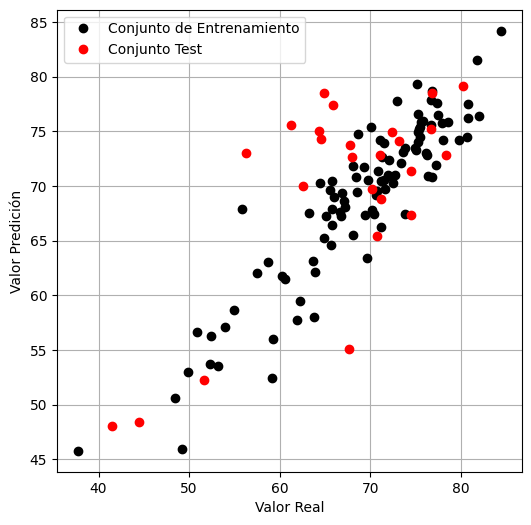

In [32]:
plt.figure(figsize=(6,6))
plt.plot(y_train_real,y_train_pred,'ko', label='Conjunto de Entrenamiento')
plt.plot(y_test_real,y_test_pred,'ro', label='Conjunto Test')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predición')
plt.legend(loc=0)
plt.grid()

Text(0, 0.5, 'Error Porcentual Absoluto')

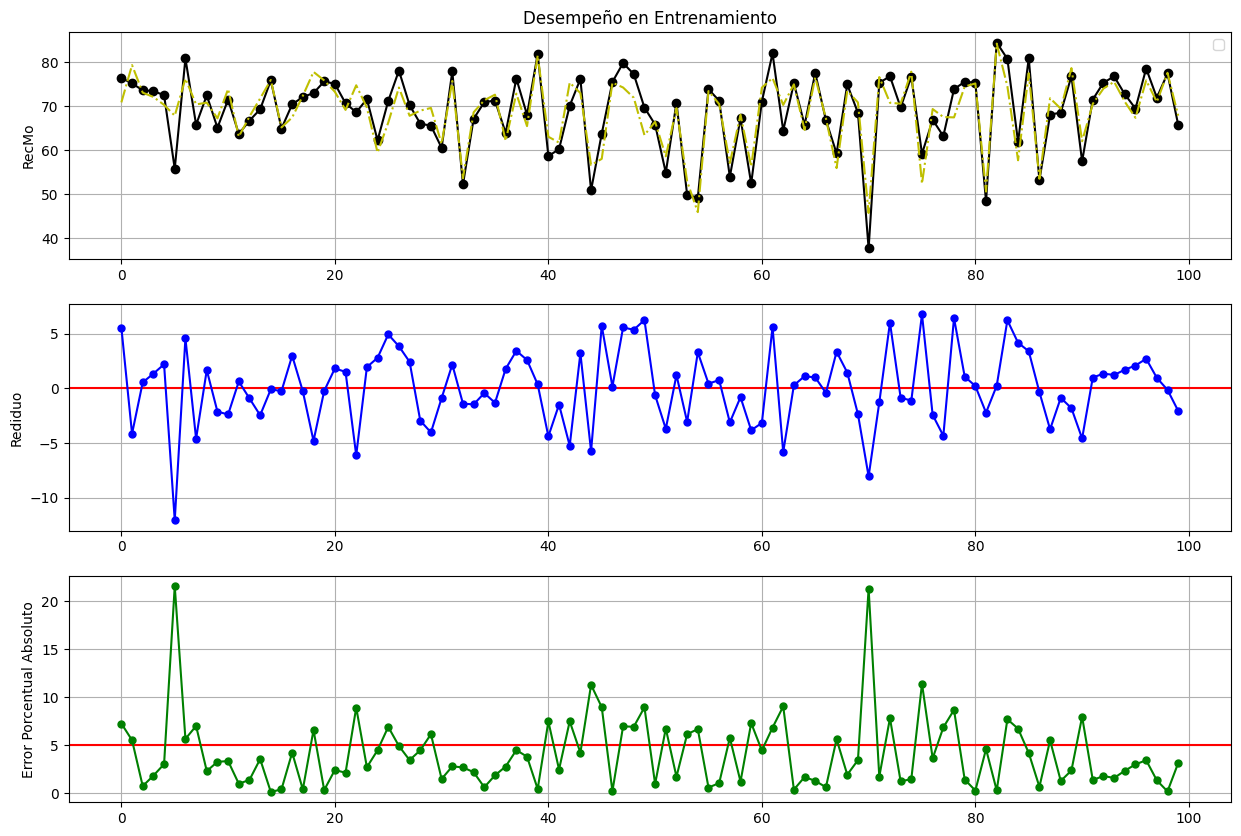

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(y_train_real,'ko-')
plt.plot(y_train_pred,'y-.')
plt.grid()
plt.legend(loc=0)
plt.title('Desempeño en Entrenamiento')
plt.ylabel('RecMo')

e_train = y_train_real-y_train_pred

plt.subplot(3,1,2)
plt.axhline(0, color='Red')
plt.plot(e_train,'bo-',ms=5)
plt.grid()
plt.ylabel('Rediduo')

EPA_train = 100*np.abs((y_train_real-y_train_pred)/y_train_real)

plt.subplot(3,1,3)
plt.axhline(5, color='Red')
plt.plot(EPA_train,'go-',ms=5)
plt.grid()
plt.ylabel('Error Porcentual Absoluto')

Text(0, 0.5, 'Error Porcentual Absoluto')

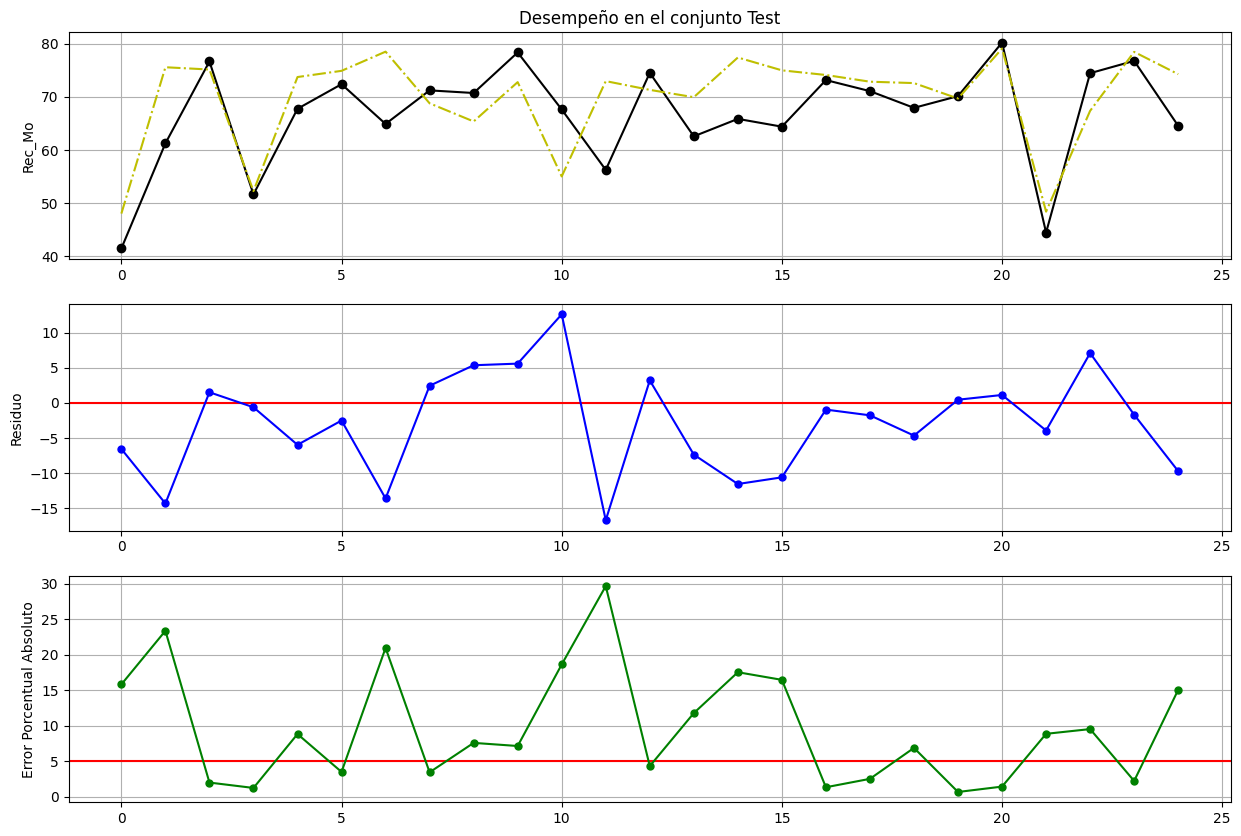

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(y_test_real,'ko-')
plt.plot(y_test_pred,'y-.')
plt.grid()
plt.title('Desempeño en el conjunto Test')
plt.ylabel('Rec_Mo')
e_test = y_test_real-y_test_pred

plt.subplot(3,1,2)
plt.axhline(0, color='Red')
plt.plot(e_test,'bo-',ms=5)
plt.grid()
plt.ylabel('Residuo')

EPA_test = 100*np.abs((y_test_real-y_test_pred)/y_test_real)

plt.subplot(3,1,3)
plt.axhline(5, color='Red')
plt.plot(EPA_test,'go-',ms=5)
plt.grid()
plt.ylabel('Error Porcentual Absoluto')


Como conclusion se desprende que el modelo que mejor funciona es por lejos la red neuronal, pero aun así se debe mejorar el modelo para arrojar valores de acierto que superen el 95%, lo que sería un buen modelo.